In [156]:
from models.rlagent import AgentBandit
from models.rlenvironment import Environment
from models.regression import Regression
from sklearn import preprocessing
from torch.optim.lr_scheduler import StepLR

import numpy as np
import pandas as pd
import torch.nn as nn
import utils.datasets as DB

In [157]:
datasets = DB.Datasets()
datasets.download_UCI()

2023-03-08 13:27:20,074 [INFO] Folder for UCI Mushroom found in the data folder. If the files are corrupted please delete the folder at location ../data/UCI_Mushroom and re-run this command


In [158]:
col_names = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
         'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
         'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
         'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']
mushrooms = pd.read_csv('data/UCI_Mushroom/agaricus-lepiota.data', header=None, names=col_names)
display(mushrooms.head(2))


labels = mushrooms['class']
context = mushrooms.drop(columns='class')

# transform to numerical encoding
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)    # Binary labels

context_le = context.copy()
for colname in context.columns:
    context_le[colname] = label_encoder.fit_transform(context[colname])

# Transform context to one-hot encoding
ohe = preprocessing.OneHotEncoder(sparse=False)
context_ohe = ohe.fit_transform(context_le)#.toarray()

labels = 1-labels
print(context_ohe.shape)
print(labels.shape)
print(labels[:3])


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


(8124, 117)
(8124,)
[0 1 1]


C:\Users\vilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [169]:
agent_args0 = {
        'model_class'    : Regression, 
        'model_name'     : 'test_rl',
        'input_dim'      : 117+2,
        'output_dim'     : 1,
        'hl_type'        : nn.Linear,
        'hl_units'       : 100,
        'batch_size'     : 64,
        'buffer_size'    : 4096,
        'scheduler'      : [StepLR, 5000, 0.5],
        'data_contexts'  : context_ohe,
        'data_labels'    : labels,
        'training_steps' : 64,
        'n_samples'      : 1,
        'epsilon'        : 0,
        'learning_rate'  : 0.01
}

agent_args01 = {
        'model_class'    : Regression, 
        'model_name'     : 'test_rl',
        'input_dim'      : 117+2,
        'output_dim'     : 1,
        'hl_type'        : nn.Linear,
        'hl_units'       : 100,
        'batch_size'     : 64,
        'buffer_size'    : 4096,
        'scheduler'      : [StepLR, 5000, 0.5],
        'data_contexts'  : context_ohe,
        'data_labels'    : labels,
        'training_steps' : 64,
        'n_samples'      : 1,
        'epsilon'        : 0.01,
        'learning_rate'  : 0.01
}

agent_args05 = {
        'model_class'    : Regression, 
        'model_name'     : 'test_rl',
        'input_dim'      : 117+2,
        'output_dim'     : 1,
        'hl_type'        : nn.Linear,
        'hl_units'       : 100,
        'batch_size'     : 64,
        'buffer_size'    : 4096,
        'scheduler'      : [StepLR, 5000, 0.5],
        'data_contexts'  : context_ohe,
        'data_labels'    : labels,
        'training_steps' : 64,
        'n_samples'      : 1,
        'epsilon'        : 0.05,
        'learning_rate'  : 0.01
}

In [170]:
env0 = Environment(**agent_args0)
env01 = Environment(**agent_args01)
env05 = Environment(**agent_args05)
loss0 = []
loss01 = []
loss05 = []

In [171]:
for epoch in range(50000):
    if epoch%5000==0:
        print(epoch)
    l0 = env0.new_mushroom()
    loss0.append(np.float64(l0))
    
    l1 = env01.new_mushroom()
    loss01.append(np.float64(l1))
    
    l5 = env05.new_mushroom()
    loss05.append(np.float64(l5))

0


C:\Users\vilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:163: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = asanyarray(a)
C:\Users\vilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure the

5000
10000
15000
20000
25000
30000
35000
40000
45000


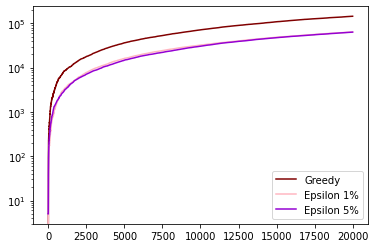

In [144]:
# LabelEncoder, but p=0, e=1
import matplotlib.pyplot as plt
plt.plot(env0.cum_regret, label='Greedy', color='maroon')
plt.plot(env01.cum_regret, label='Epsilon 1%', color='lightpink')
plt.plot(env05.cum_regret, label='Epsilon 5%', color='darkviolet')
plt.legend()
plt.yscale('log')
plt.show()

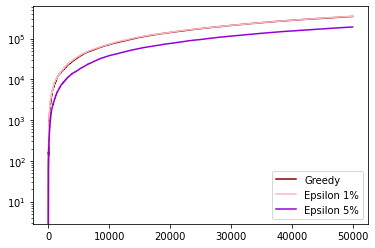

In [173]:
# One-hot and p=0, e=1
import matplotlib.pyplot as plt
plt.plot(env0.cum_regret, label='Greedy', color='maroon')
plt.plot(env01.cum_regret, label='Epsilon 1%', color='lightpink')
plt.plot(env05.cum_regret, label='Epsilon 5%', color='darkviolet')
plt.legend()
plt.yscale('log')
plt.show()

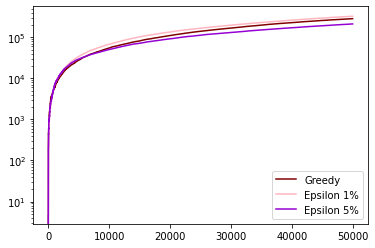

In [120]:
# LabelEncoder labels
import matplotlib.pyplot as plt
plt.plot(env0.cum_regret, label='Greedy', color='maroon')
plt.plot(env01.cum_regret, label='Epsilon 1%', color='lightpink')
plt.plot(env05.cum_regret, label='Epsilon 5%', color='darkviolet')
plt.legend()
plt.yscale('log')
plt.show()

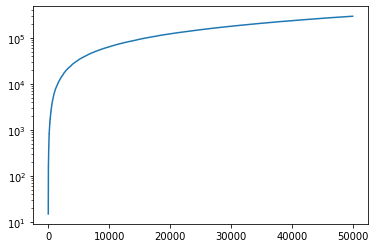

In [9]:
# Alternative agent
import matplotlib.pyplot as plt
plt.plot(env.cum_regret)
plt.yscale('log')
plt.show()
plt.plot(loss)
plt.title("Loss")
plt.show()

[0.25127777401339857, 0.2546993297766758, 0.24851185490689054, 0.24732049952266816, 0.24600373699744008, 0.24564280355699913, 0.2478366983004074, 0.25356550516458265, 0.25129687523627414, 0.24930590560751864]


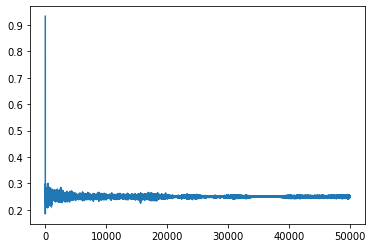

In [16]:
plt.plot(loss)
print(loss[-10:])